In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
iris = datasets.load_iris()

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from time import time
import matplotlib.pyplot as plt
from operator import itemgetter

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['species'] = np.array([iris.target_names[i] for i in iris.target])

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


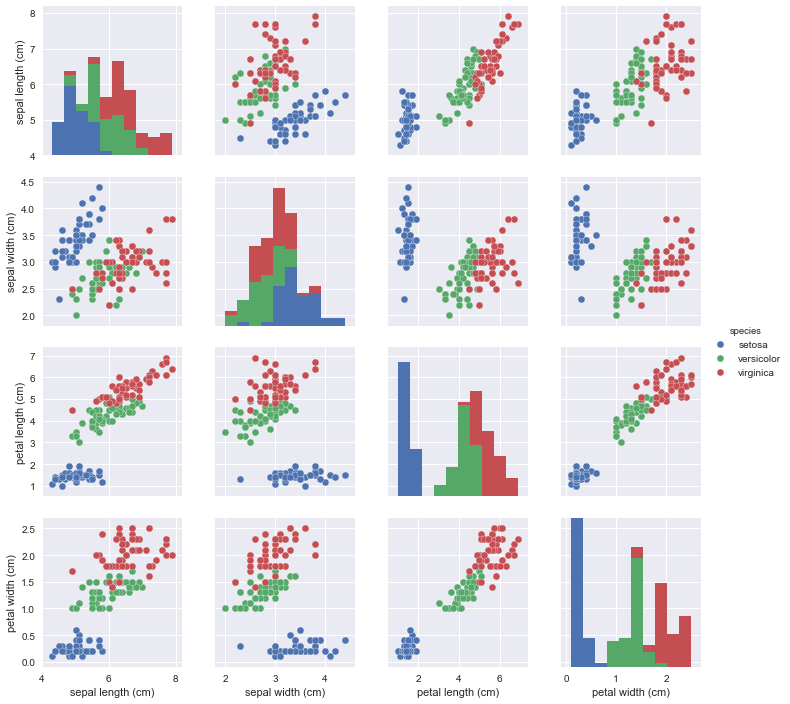

In [34]:
sns.pairplot(df, hue = 'species')
plt.show()

In [29]:
tester = pd.read_csv('..//..//..//Documents//Test_sets//Testing_Sample//HI1539B//Edits//HI1539_SMLsetup.csv')
tester.head()

,Unnamed: 0,Selection,Count,Zmin,Zmax,Zmean,mintomean,navlin_dis,berth_dis,Rangez
0,0,0.0,13,21.145,21.347,21.246923,0.995203,0.012024,0.010475,0.202
1,0,0.0,44,21.156,21.329,21.243500,0.995881,0.011925,0.010438,0.173
2,0,0.0,5,21.287,21.492,21.389800,0.995194,0.011825,0.010401,0.205
3,0,0.0,35,15.391,15.846,15.665714,0.982464,0.002047,0.011460,0.455
4,0,0.0,59,15.158,15.808,15.480254,0.979183,0.001947,0.011513,0.650


In [32]:
tester2 = tester.loc[:,['Selection','Count', 'Zmin', 'Zmax', 'Zmean', 'mintomean', 'navlin_dis', 'berth_dis', 'Rangez']]

In [44]:
data = tester2.loc[:,['Count', 'Zmin', 'Zmax', 'Zmean', 'mintomean', 'navlin_dis', 'berth_dis', 'Rangez']]
target = tester2.loc[:,['Selection']]


In [46]:
dfList = target['Selection'].tolist()

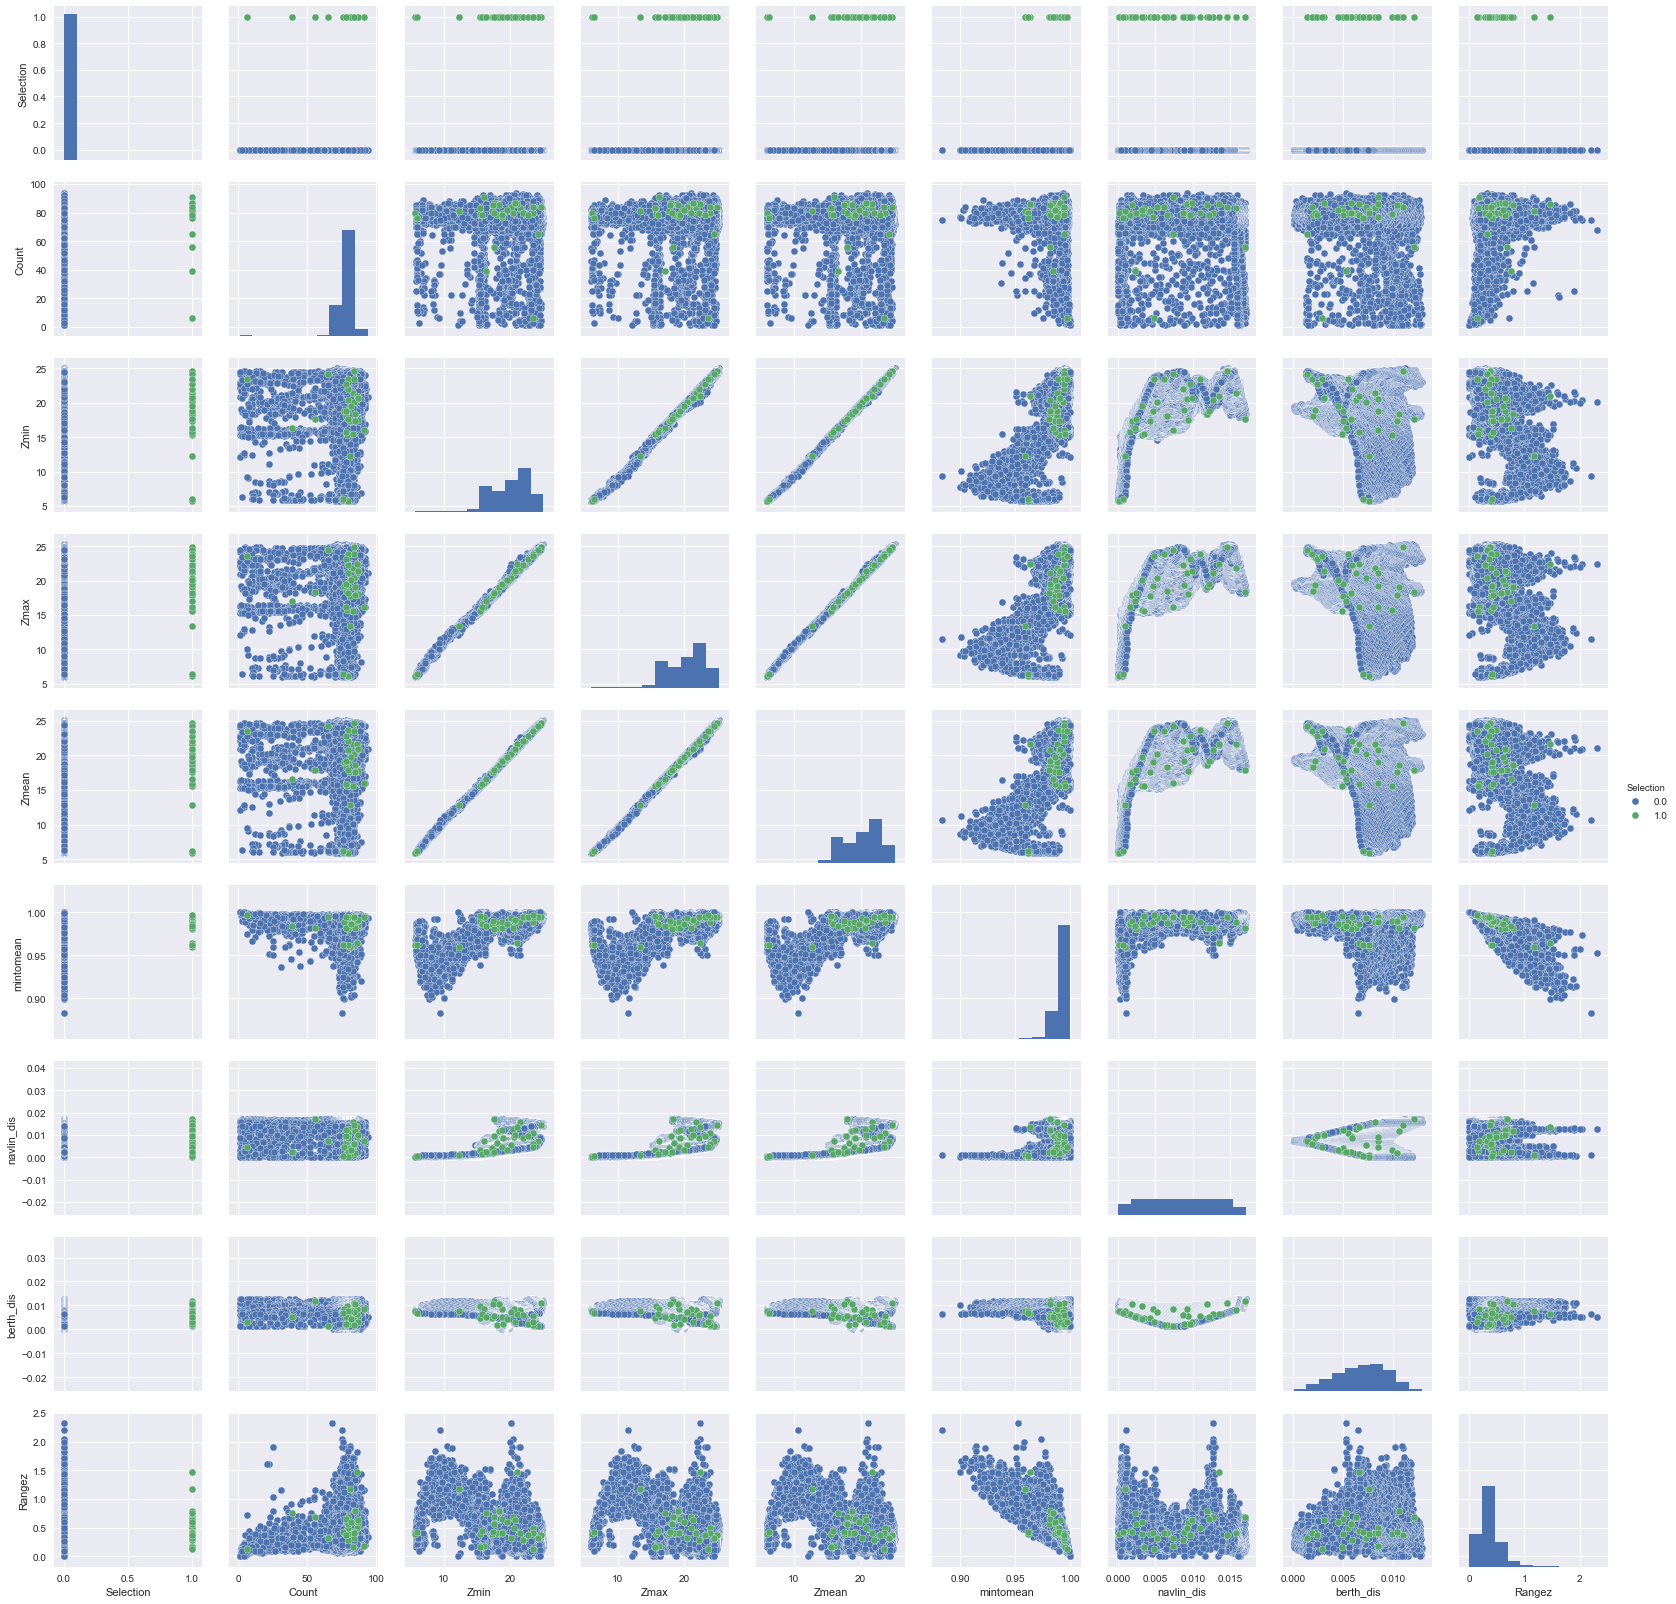

In [33]:
sns.pairplot(tester2, hue = 'Selection')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify = iris.target,random_state=123456)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(data, dfList, test_size=0.2, stratify = target,random_state=123456)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score (y_test,predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.999
Mean accuracy score: 0.999


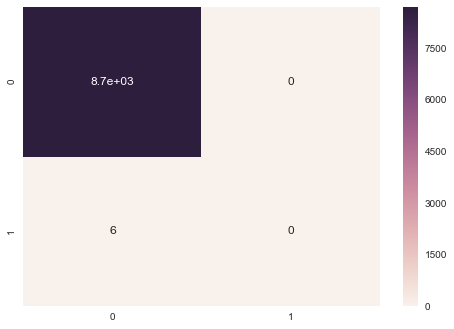

In [56]:
from sklearn.metrics import confusion_matrix 

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
http://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
    

# real

In [2]:
path = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_10m//comp//'

In [3]:
dataset = pd.read_csv(path+"Meanfinal//Mean10m_o4p3b1.csv")

In [4]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.astype(float)
len(dataset)

2710

In [5]:
columns = dataset.columns.values

param=[]
correlation=[]
abs_corr=[]

for c in columns:
    #Check if binary or continuous
    if len(dataset[c].unique())<=2:
        corr = spearmanr(dataset['Selection'],dataset[c])[0]
    else:
        corr = pointbiserialr(dataset['Selection'],dataset[c])[0]
    param.append(c)
    correlation.append(corr)
    abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df.head()

NameError: name 'pointbiserialr' is not defined

In [6]:
target = dataset['Selection']
#data = dataset.drop(['Selection'], axis=1)
data = dataset.drop(['Selection'], axis=1)
#data = dataset.drop(['B2','B3','B1','B4','B5','B6', 'B7', 'B8','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11', 'C12', 'C13', 'C14', 'C15','C16','Selection'], axis=1)

In [7]:
# target= pd.read_csv(path+"final//MinSelection_10m_o4p5b1.csv")
# data = pd.read_csv(path+"final//MinOther_10m_o4p5b1.csv")

In [8]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Selection, dtype: int64

In [9]:
data.head()

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C11,C12,C13,C14,C15,C16,mindep,cellav,allav,drange
0,0.699105,0.523597,0.845961,0.707071,7.070568e-01,0.935508,0.642501,0.942804,0.777002,0.757460,...,0.766343,0.734142,0.162051,0.526465,7.070355e-01,0.728974,11.423400,0.301484,-3.038687,0.649180
1,0.999974,0.142582,0.707075,0.945545,9.999347e-01,0.707076,0.090803,0.793582,0.169831,0.771725,...,0.342583,0.828063,0.471201,0.447688,7.367055e-01,0.568848,7.831703,0.886610,0.553010,2.147247
2,0.999963,0.550400,0.597798,0.294841,4.276751e-01,0.999954,0.535919,0.581665,0.110038,0.796352,...,0.914972,0.793153,0.155752,0.447560,8.254675e-01,0.501214,8.991404,0.700686,-0.606691,1.367596
3,0.999910,0.707036,0.999910,0.707046,5.316222e-01,0.707041,0.937026,0.707034,0.325267,0.789565,...,0.999781,0.716628,0.757299,0.315604,6.122590e-17,0.315621,8.273400,0.326139,0.111313,0.684095
4,0.512527,0.854831,0.999893,0.707051,6.122679e-17,0.707054,0.781595,0.350121,0.524829,0.999885,...,0.599616,0.444587,0.189328,0.315615,7.070513e-01,0.315622,7.240050,0.329985,1.144663,0.757059


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
dfList = dataset['Selection'].tolist()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, dfList, test_size=0.3, stratify = target,random_state=16)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score (y_test,predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.704
Mean accuracy score: 0.679


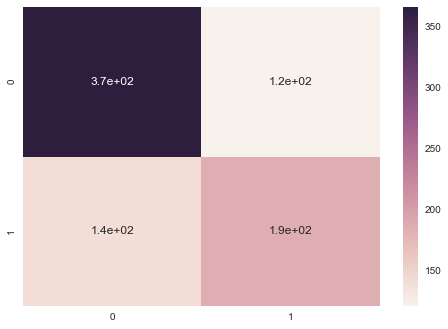

In [16]:
from sklearn.metrics import confusion_matrix 

cm = pd.DataFrame(confusion_matrix(y_test,predicted))
sns.heatmap(cm, annot = True)
plt.show()

In [17]:
len(data)

2710

In [18]:
x_train = x_train.astype(float)
# y_train = y_train.astype(float)
x_test = x_test.astype(float)
# y_test = y_test.astype(float)


In [196]:
# calculate the time to run a GridSearchCV for multiple numbers of parameter permutations.  
grid_times = {}
clf = RandomForestClassifier(random_state = 84)

features = x_train.columns

# I commented this out after running once locally since this block of code takes a long time to run

# for number in np.arange(2, 1000, 100):
    
#     param = np.arange(1,number,10)
#     param_grid = {"n_estimators": param,
#                   "criterion": ["gini", "entropy"]}
    
#     grid_search = GridSearchCV(clf, param_grid = param_grid)
    
#     t0 = time()
#     grid_search.fit(x_train[features], y_train)
#     compute_time = time() - t0
#     grid_times[len(grid_search.grid_scores_)] = time() - t0
    
# grid_times = pd.DataFrame.from_dict(grid_times, orient = 'index')

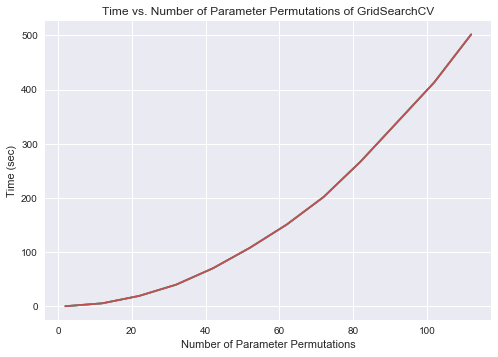

In [119]:
# final = pd.DataFrame.from_dict(grid_times)
# final = final.sort_index()
# plt.plot(final.index.values, final[0])
# plt.xlabel('Number of Parameter Permutations')
# plt.ylabel('Time (sec)')
# plt.title('Time vs. Number of Parameter Permutations of GridSearchCV')
# plt.show()

In [19]:
# function takes a RF parameter and a ranger and produces a plot and dataframe of CV scores for parameter values
def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(x_train[features], y_train)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

In [20]:
# parameters and ranges to plot
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

In [21]:
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1
plt.show()

NameError: name 'clf' is not defined

above from https://www.kaggle.com/hadend/tuning-random-forest-parameters

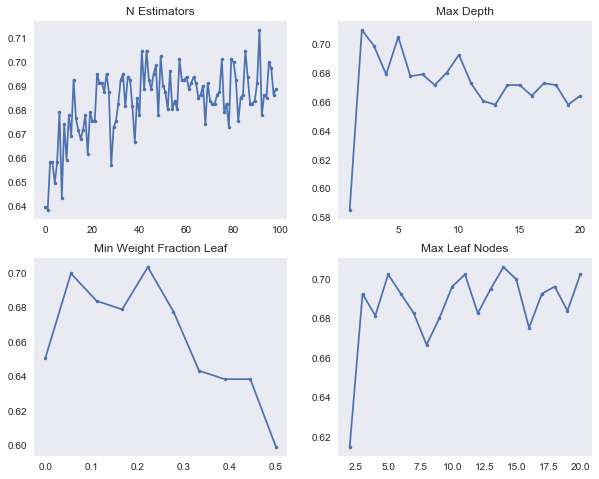

In [36]:
plt.figure(figsize=(10,8))

#N Estimators
plt.subplot(2,2,1)
feature_param = range(1,100)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(x_train,y_train)
    scoreCV = clf.score(x_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis()
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('N Estimators')
plt.grid();


# #Criterion
# plt.subplot(3,3,2)
# feature_param = ['gini','entropy']
# scores=[]
# for feature in feature_param:
#     clf = RandomForestClassifier(criterion=feature)
#     clf.fit(x_train,y_train)
#     scoreCV = clf.score(x_test,y_test)
#     scores.append(scoreCV)
# plt.plot(scores, '.-')
# # plt.xlabel('parameter')
# # plt.ylabel('score')
# plt.title('Criterion')
# plt.xticks(range(len(feature_param)), feature_param)
# plt.grid();

# #Max Features
# plt.subplot(3,3,3)
# feature_param = ['auto','sqrt','log2',None]
# scores=[]
# for feature in feature_param:
#     clf = RandomForestClassifier(max_features=feature)
#     clf.fit(x_train,y_train)
#     scoreCV = clf.score(x_test,y_test)
#     scores.append(scoreCV)
# plt.plot(scores, '.-')
# plt.axis('tight')
# # plt.xlabel('parameter')
# # plt.ylabel('score')
# plt.title('Max Features')
# plt.xticks(range(len(feature_param)), feature_param)
# plt.grid();

#Max Depth
plt.subplot(2,2,2)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(x_train,y_train)
    scoreCV = clf.score(x_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Max Depth')
plt.grid();

# #Min Samples Split
# plt.subplot(3,3,2)
# feature_param = range(2,21)
# scores=[]
# for feature in feature_param:
#     clf = RandomForestClassifier(min_samples_split =feature)
#     clf.fit(x_train,y_train)
#     scoreCV = clf.score(x_test,y_test)
#     scores.append(scoreCV)
# plt.plot(feature_param, scores, '.-')
# plt.axis('tight')
# # plt.xlabel('parameter')
# # plt.ylabel('score')
# plt.title('Min Samples Split')
# plt.grid();

#Min Weight Fraction Leaf
plt.subplot(2,2,3)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf =feature)
    clf.fit(x_train,y_train)
    scoreCV = clf.score(x_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(2,2,4)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(x_train,y_train)
    scoreCV = clf.score(x_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Max Leaf Nodes')
plt.grid();

plt.show()

In [ ]:
#https://www.kaggle.com/creepykoala/study-of-tree-and-forest-algorithms/notebook

# #The general high varience in N Estimator plot shows the risk of overfitting.
# All otehr parameters show low score variance.